Pregunta 7

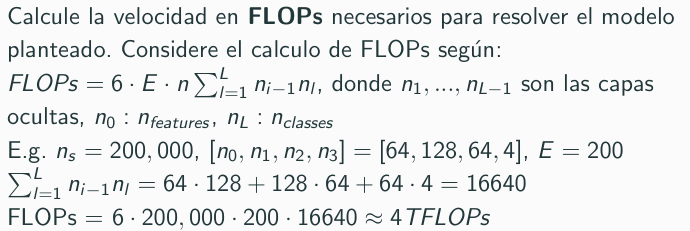

In [1]:
# Función para calcular FLOPs
def calcular_flops(E, n, capas):
    """
    Calcula los FLOPs necesarios para entrenar un modelo MLP.

    Parámetros:
    E     : número de épocas
    n     : número de muestras
    capas : lista con el tamaño de cada capa [n0, n1, ..., nL]

    Retorna:
    FLOPs totales
    """
    suma = sum(capas[i] * capas[i+1] for i in range(len(capas)-1))
    flops = 6 * E * n * suma
    return flops

In [3]:
E = 200
n = 200_000
capas = [64, 512, 256, 128, 4]   # entrada, ocultas y salida

flops = calcular_flops(E, n, capas)

print("===================================")
print(f"FLOPs = {flops:.2e}")
print(f"Aproximadamente {flops/1e12:.2f} TFLOPs")
print("===================================")

FLOPs = 4.73e+13
Aproximadamente 47.31 TFLOPs


8. Proponga la cantidad de nodos en un cluster como Khipu necesarios para resolver el problema. ¿Necesita GPUs para este caso?

In [54]:
costo_computacional = 47.31*10**12  #workload 47.31 TFLOPs

# info de rendimiento: https://docs.khipu.utec.edu.pe/info/infraestructura/
#rendimiento_cpu_n003 = 1.44e12  # 1.44 TFLOPs <- 96 cores x 15 GFLOPs
rendimiento_cpu_n003 = 32*15e9  # 0.48 TFLOPs <- 32 cores x 15 GFLOPs (realista)
rendimiento_gpu_ag001 = 39e12  # 2(NVIDIA H100)x19.5 TFLOPs


tiempo_estimado_nodo_gpu = costo_computacional / rendimiento_gpu_ag001
tiempo_estimado_nodo_cpu = costo_computacional / rendimiento_cpu_n003


print(f"Tiempo estimado GPU_ag001: {tiempo_estimado_nodo_gpu:.2f} segundos")
print(f"Tiempo estimado CPU_n003: {tiempo_estimado_nodo_cpu:.2f} segundos")
print(f"CPU_n003 / GPU_ag001: {tiempo_estimado_nodo_cpu/tiempo_estimado_nodo_gpu}")
print("===================================")
print("La necesidad de GPU depende del tiempo disponible para entrenamiento. Si el tiempo no es restrictivo, un nodo CPU es suficiente. " \
"Si se requiere alto desempeño, entonces se justifica el uso de GPU.")

Tiempo estimado GPU_ag001: 1.21 segundos
Tiempo estimado CPU_n003: 98.56 segundos
CPU_n003 / GPU_ag001: 81.25
La necesidad de GPU depende del tiempo disponible para entrenamiento. Si el tiempo no es restrictivo, un nodo CPU es suficiente. Si se requiere alto desempeño, entonces se justifica el uso de GPU.
